# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

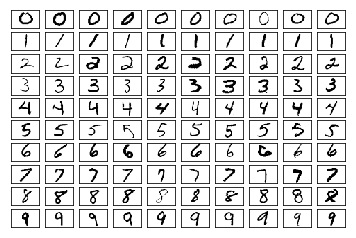

In [3]:
def P1(num_examples):

### STUDENT START ###

#Create a grid with 10 rows and 10 columns
    figure, grid = plt.subplots(nrows=num_examples, ncols=num_examples, sharex=True,
       sharey=True)
    grid = grid.flatten()

    for i in range(100):
        if i < 10:
            digit = X[Y == 0][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 10 <= i < 20:
            digit = X[Y == 1][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 20 <= i < 30:
            digit = X[Y == 2][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 30 <= i < 40:
            digit = X[Y == 3][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 40 <= i < 50:
            digit = X[Y == 4][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 50 <= i < 60:
            digit = X[Y == 5][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 60 <= i < 70:
            digit = X[Y == 6][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')        
        elif 70 <= i < 80:
            digit = X[Y == 7][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        elif 80 <= i < 90:
            digit = X[Y == 8][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')
        else:
            digit = X[Y == 9][i]
            digit = digit.reshape(28,28)
            grid[i].imshow(digit, cmap = 'Greys', interpolation = 'nearest')        
        
    grid[0].set_xticks([])
    grid[0].set_yticks([])

    plt.show()

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(mini_train_data, mini_train_labels)
        
        prediction = clf.predict(dev_data)
        accuracy = clf.score(dev_data, dev_labels)
        print("The accuracy on the dev set is:", round(accuracy,3), "for a k of", k)
        print(classification_report(dev_labels, prediction))

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

The accuracy on the dev set is: 0.888 for a k of 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

The accuracy on the dev set is: 0.878 for a k of 3
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75    

ANSWER:

For K-Nearest-Neighbors = 1, the most difficult digit to predict is 9. It has the lowest F1 score at 0.80. It has the second lowest precision at 0.78, and the second lowest lower recall of 0.82.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:
        
        train_data_2, train_labels_2 = X[:size], Y[:size]
        clf = KNeighborsClassifier(n_neighbors = 1)
        clf.fit(train_data_2, train_labels_2)
        
        start_time = time.time()
        prediction = clf.predict(dev_data)
        end_time = time.time()
        total_time = end_time - start_time
        
        accuracy = clf.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        print("Training size:", size)
        print("Prediction time:", round(total_time,2), "seconds")
        print("Accuracy:", accuracy, "\n")
        

        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size: 100
Prediction time: 0.09 seconds
Accuracy: 0.72 

Training size: 200
Prediction time: 0.17 seconds
Accuracy: 0.786 

Training size: 400
Prediction time: 0.36 seconds
Accuracy: 0.841 

Training size: 800
Prediction time: 0.73 seconds
Accuracy: 0.884 

Training size: 1600
Prediction time: 1.54 seconds
Accuracy: 0.902 

Training size: 3200
Prediction time: 3.1 seconds
Accuracy: 0.926 

Training size: 6400
Prediction time: 6.18 seconds
Accuracy: 0.937 

Training size: 12800
Prediction time: 12.85 seconds
Accuracy: 0.959 

Training size: 25000
Prediction time: 25.13 seconds
Accuracy: 0.97 



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4(size):

### STUDENT START ###
    train_size_matrix = np.asmatrix(train_sizes).reshape(9,1)
    lr = LinearRegression()
    linear_mod = lr.fit(train_size_matrix, accuracies)
    print("The predicted accuracy of training size", size, "is:", round(linear_mod.predict(size)[0],2))
    
    log_mod = lr.fit(np.log(train_size_matrix), accuracies)
    print("The predicted accuracy of log transformation with a training size of", size, "is:", 
          round(log_mod.predict(np.log(size))[0],2))

### STUDENT END ###

P4(60000)

The predicted accuracy of training size 60000 is: 1.24
The predicted accuracy of log transformation with a training size of 60000 is: 1.03


ANSWER: Fitting a linear regression model that predicts the accuracy from the training size does not make sense. In this case of n=60000, the accuracy is 124%. Obviously we can not be more than 100% accurate. A linear regression model assumes that there is a linear relationship between the training size and the accuracy meaning that our accuracy can be infinitely large. Most likely, this is more of a logarithmic relationship. Even with a log transformation, we can still be above 100% accuracy. A logit model might be more appropriate.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


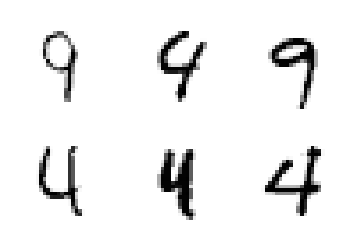

In [13]:
def P5():

### STUDENT START ###
    clf = KNeighborsClassifier(n_neighbors = 1)
    clf.fit(mini_train_data, mini_train_labels)
    
    prediction = clf.predict(dev_data)
    print(confusion_matrix(dev_labels, prediction))
    #4 and 9 appear to the most confused pair of digits
    
    #print examples of 4 and 9
    figure, grid = plt.subplots(nrows=2, ncols=3, sharex=True,
    sharey=True)
    grid = grid.flatten() 
                                
    iteration = 0
    for index, num in enumerate(dev_labels):   
        if iteration == 6:
            break
        
        #4s mislabeled as 9s
        if num == 9 and prediction[index] == 4: 
                digit = dev_data[index]
                digit = digit.reshape(28,28)
                grid[iteration].imshow(digit, cmap = 'Greys')
                grid[iteration].axis('off')
                iteration +=1
                
        #9s mislabeled as 4s
        elif num == 4 and prediction[index] == 9:
                digit = dev_data[index]
                digit = digit.reshape(28,28)
                grid[iteration].imshow(digit, cmap = 'Greys')
                grid[iteration].axis('off')
                iteration+=1
                
    grid[0].set_xticks([])
    grid[0].set_yticks([])

    plt.show()    

### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [14]:
import warnings
warnings.filterwarnings('ignore') 

def P6(data):
    
### STUDENT START ###
    #make a copy of the dataset
    data2 = np.copy(data)

    #make an array to store the coordinates of all pixels
    position = np.zeros((28,28,2))
    for x in range(position.shape[0]):
        for y in range(position.shape[1]):
            position[x,y,0] = x
            position[x,y,1] = y

    #K-Nearest Neighbors with K=8
    blur = KNeighborsClassifier(n_neighbors = 8)
    blur.fit(np.concatenate(position), np.zeros(784))
    
    #use blur b to get the indices/distances of its 8 neighbors
    sigma = 1.5
    for row in range(28):
        for col in range(28):
            distances = blur.kneighbors([row, col])
            #use Gaussian function to each of the distances to get the weight of each pixel
            total_weights = (1/((2*np.pi*sigma**2)))*np.exp(-(distances[0]**2)/2*sigma**2)
            #make it so weight distributions divided by themselves will = 1
            weights = total_weights/sum(total_weights)

            #make a blurred copy by taking the average 
            data2[(27*row)+col] = np.average(data[distances[1]], weights=weights.tolist())

    return data2

#Create blurred datasets
blurred_training_data = np.apply_along_axis(P6, 1, mini_train_data)
blurred_dev_data = np.apply_along_axis(P6, 1, dev_data)

model = KNeighborsClassifier(n_neighbors = 1)

#Preprocess training
model.fit(blurred_training_data, mini_train_labels)
print("Preprocess the training data but not the dev data accuracy:",
      model.score(dev_data, dev_labels))

#Preprocess dev
model.fit(mini_train_data, mini_train_labels)
print("Preprocess the dev data but not the training data accuracy:",
      model.score(blurred_dev_data, dev_labels))

#Preprocess training and dev
model.fit(blurred_training_data, mini_train_labels)
print("Preprocess the training data and dev data accuracy:",
      model.score(blurred_dev_data, dev_labels))

Preprocess the training data but not the dev data accuracy: 0.155
Preprocess the dev data but not the training data accuracy: 0.154
Preprocess the training data and dev data accuracy: 0.909


ANSWER: Preprocessing both the dev and training data is the most accurate model by far. This makes sense because you cannot just blur one without the other. You would be training based on one kind of dataset but testing based on another kind of dataset.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [15]:
def P7(data, labels, value):

### STUDENT START ###
    binarized_data = np.zeros(data.shape)
    
    for pixel in range(data.shape[1]):
        binarized_data[:, pixel] = data[:, pixel] > 1/value
        
    if value == 2:
        bernoullinb_model = BernoulliNB(binarize = 1/value)
        bernoullinb_model.fit(binarized_data, labels)
        print("Naive Bayes classifier with binary values accuracy:", bernoullinb_model.score(binarized_data, labels))
        
    else:
        multinomialnb_model = MultinomialNB(1/value)
        multinomialnb_model.fit(binarized_data, labels)
        print("Naive Bayes classifier with multinomal values accuracy:", multinomialnb_model.score(binarized_data, labels))
    
### STUDENT END ###

P7(mini_train_data, mini_train_labels, 2)
P7(mini_train_data, mini_train_labels, 3)

Naive Bayes classifier with binary values accuracy: 0.846
Naive Bayes classifier with multinomal values accuracy: 0.849


ANSWER: The multinomial Naive Baynes classifier has a slightly better accuracy than the binomial Naive Baynes classifier. This makes sense looking at the previous question where blurring produced a high accuracy. A multinomial classifier adds a small blurring effect compared to the binomial classifier.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [17]:
def P8(alphas):

### STUDENT START ###
    bernoullinb = BernoulliNB(binarize=.5)
    grid_search = GridSearchCV(bernoullinb, alphas)
    grid_search.fit(mini_train_data, mini_train_labels)
    return grid_search

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print(nb.grid_scores_)

[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}, mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}, mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}, mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}, mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}, mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}]


In [18]:
print(nb.best_params_)

{'alpha': 0.01}


ANSWER: The best value for alpha is 0.01 with a mean of 82.1%. The accuracy when alpha=0 is 9.2%. This makes sense because it means that approximately 10% of the posterior probability is dependent on the value of the number alone and since we have 10 digits, 10% makes complete sense with alpha=0.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [19]:
def P9():

### STUDENT END ###
    gaussian_model = GaussianNB()
    gaussian_model.fit(mini_train_data, mini_train_labels)
    print("Theta:", gaussian_model.theta_, "\n")
    print("Sigma:", gaussian_model.sigma_, "\n")
    print("Gaussian Naive Baynes Accuracy:", gaussian_model.score(dev_data, dev_labels))
    
    bernoulli_model = BernoulliNB(binarize=.5)
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    print("Bernoulli Naive Baynes Accuracy:", bernoulli_model.score(dev_data, dev_labels))
    
    gaussian_model2 = GaussianNB()
    gaussian_model2.fit(mini_train_data, mini_train_labels)
    gaussian_model2.sigma_ = gaussian_model2.sigma_ / gaussian_model2.sigma_
    print("Fixed Gaussian Naive Baynes Accuracy:", gaussian_model2.score(dev_data, dev_labels))
### STUDENT END ###

gnb = P9()

Theta: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 

Sigma: [[  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 ..., 
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]] 

Gaussian Naive Baynes Accuracy: 0.621
Bernoulli Naive Baynes Accuracy: 0.815
Fixed Gaussian Naive Bayn

ANSWER: When we first fit the Gaussian model, the thetas were all 0 and the sigmas were all the same value. A Gaussian model is used for continuous data (and a continuous distribution). We changed the sigma to be equal to 1 in order to make the distribution similar to a Bernoulli distribution. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

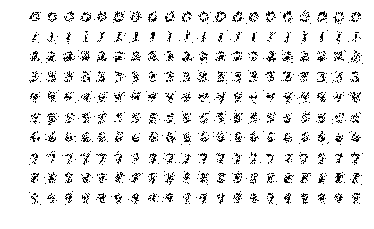

In [21]:
def P10(num_examples):

### STUDENT START ###

    #Binary Bernoulli model
    bernoulli_model = BernoulliNB(binarize = 0.5)
    bernoulli_model = bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    #probability
    probability = np.exp(bernoulli_model.feature_log_prob_)
    
    #create random arrays for each digit and print the generated digit
    for i in range(10):       
        for j in range(num_examples):
            random_array = np.random.rand(784) 
            image = probability > random_array

            grid = plt.subplot(11,num_examples, (i*num_examples)+j+1)
            grid.imshow(image[i].reshape(28,28), cmap='Greys')
            grid.axis('off')

### STUDENT END ###

P10(20)

ANSWER: The generated numbers are more blurry than the training numbers. The generated numbers are also very similar to each other. Whereas before (like when we saw 4s and 9s), the numbers in the training data had very different handwriting. This is because the variability is much lower since we binarized the data.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [31]:
def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###
    #Bernoulli model with alpha being .01
    bernoulli_model = BernoulliNB(binarize = 0.5, alpha = 0.01)
    bernoulli_model.fit(mini_train_data, mini_train_labels)

    #probabilities and predicted values
    predicted_probability = bernoulli_model.predict_proba(dev_data)
    predicted_label = bernoulli_model.predict(dev_data)
    
    #iterate through the predictions
    for index, prob in enumerate(predicted_probability):
        max_probability = np.argmax(prob)
        for i in range(len(buckets)):
            if prob[max_probability] >= buckets[i]:
                total[i] += 1
                if max_probability == dev_labels[index]:
                    correct[i] += 1

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f correct = %3d total = %3d  accuracy = %.3f' %(buckets[i], correct[i], total[i], accuracy))

p(pred) <= 0.5000000000000 correct = 818 total = 1000  accuracy = 0.818
p(pred) <= 0.9000000000000 correct = 812 total = 970  accuracy = 0.837
p(pred) <= 0.9990000000000 correct = 772 total = 884  accuracy = 0.873
p(pred) <= 0.9999900000000 correct = 720 total = 799  accuracy = 0.901
p(pred) <= 0.9999999000000 correct = 680 total = 741  accuracy = 0.918
p(pred) <= 0.9999999990000 correct = 634 total = 680  accuracy = 0.932
p(pred) <= 0.9999999999900 correct = 570 total = 607  accuracy = 0.939
p(pred) <= 0.9999999999999 correct = 507 total = 532  accuracy = 0.953
p(pred) <= 1.0000000000000 correct = 477 total = 498  accuracy = 0.958


ANSWER: The posterior probability and the accuracy appear to be correlated. They both increase as the size of the bucket increases. However, we can say that the Bernoulli Naive Baynes model is a weakly calibrated classifier since it is not a 1:1 relationship between the posterior probability and the accuracy. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()